# Train a classifier

* image : MNIST (handwritten digits) --> 28*28 = 784

* LogesticRegression clfier
* Evaluation Metric = confusion matrix

* Learning curve

* Plot predictions


In [67]:
# import packages
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score

import matplotlib.pyplot as plt


In [49]:
mnist_data = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [50]:
X = mnist_data.data # flatten
y = mnist_data.target

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
#  training
# 100 iteration
LR = LogisticRegression()
LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# prediction phase
y_pred = LR.predict(X_test)

In [54]:
# evaluation (confusion matrix)
confusion_matrix(y_test,y_pred)
print("acc: ",accuracy_score(y_test,y_pred))
print("fscore: ",f1_score(y_test,y_pred,average='macro'))

acc:  0.9178571428571428
fscore:  0.9166119578810754


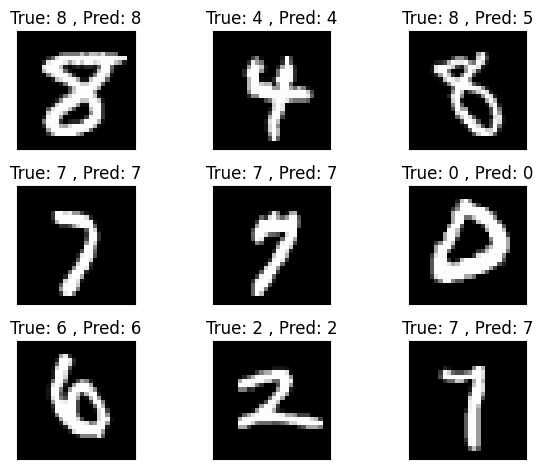

In [66]:

X_test_np = X_test.values
y_test_np = y_test.values

for i in range(9):
# کشیدن چندتا پلات کنار هم
  plt.subplot(331+i)
  true_label = y_test_np[i]
  pred_label = y_pred[i]
  plt.imshow(X_test_np[i].reshape(28,28),cmap='gray')
  plt.title(f"True: {true_label} , Pred: {pred_label}")
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()


In [68]:
svc = SVC();

svc.fit(X_train,y_train)


SVC()

In [69]:
y_pred_svc = svc.predict(X_test)

In [70]:
print("acc: ",accuracy_score(y_test,y_pred_svc))
print('fscore: ',f1_score(y_test,y_pred_svc,average='macro'))

acc:  0.9764285714285714
fscore:  0.9762962373195112


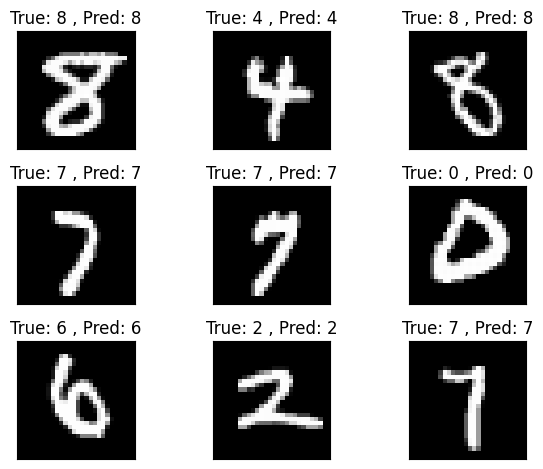

In [71]:
# X_test_np = X_test.values
# y_test_np = y_test.values

for i in range(9):
# کشیدن چندتا پلات کنار هم
  plt.subplot(331+i)
  true_label = y_test_np[i]
  pred_label = y_pred_svc[i]
  plt.imshow(X_test_np[i].reshape(28,28),cmap='gray')
  plt.title(f"True: {true_label} , Pred: {pred_label}")
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()